# Pandas for Data Scientists

    In this notebook we will learn the basics of the Pandas library for data scientists. 
    
    Pandas is an open-source library built on top of numpy 
    Providing high-performance, easy-to-use data structures and data analysis tools. 
    It allows for fast analysis and data cleaning and preparation.

    The NumPy module works with the numerical data.
    Whereas, The Pandas module mainly works with the tabular data. 
    
    The NumPy module offers a powerful object/ data structure called array.
    Whereas Pandas provides powerful data structures like Series and DataFrame that mainly used for analyzing
    the data. 

    Numpy has a better performance with less number of rows (500K or less). 
    The Pandas module has a better performance with larger number of rows (500K or more). 
    
    Indexing of the pandas series is very slow as compared to numpy arrays
    
    Pandas offers label-based indexing (integer, strings, objects), so more flexible and descriptive indexing. 
    NumPy arrays are typically integer-based, and their indexing is simpler and faster.

## Remember to Install Pandas 
!pip install pandas


    In the first cell we put the code to import the pandas library as pd. 
    This is for convenience; every time we need to use some functionality from the pandas library, we will write pd instead of pandas.

In [ ]:
import pandas as pd

### DataFrames and DataSeries

The key data structure in Pandas is the **DataFrame** object. A DataFrame is basically a tabular data structure, with rows and columns. Rows have a specific index to access them, which can be any name or value. In Pandas, the columns are called **Series**, a special type of data structure, which in essence consists of a list of several values, where each value has an index. 
Therefore, the DataFrame data structure can be seen as a spreadsheet, but it is much more flexible. 


### Creating a new DataFrame  and DataSeries

To understand how it works, let us see how to create a Series and DataFrame.

### Creating new DataSeries from the scratch
How to create a DataFrame from a common Python list.

In [42]:
years = [2011, 2012, 2013, 2014, 2015]
s_years = pd.Series(years)
s_years

0    2011
1    2012
2    2013
3    2014
4    2015
dtype: int64

In [43]:
s_years.index.dtype

dtype('int64')

In [44]:
index_order = [1, 2, 'a', 'b', 'c']
s_years = pd.Series(years, index=index_order) # The number of values in the order list must be equal to total records.
s_years

1    2011
2    2012
a    2013
b    2014
c    2015
dtype: int64

In [45]:
s_years.index.dtype # dtype('O') refers to data type of an object and contain elements of objects or mixed data types.

dtype('O')

### Creating new DataSeries from the scratch
How to create a DataFrame from a common Python dictionary and lists.

In this example, we use the pandas `DataFrame` object constructor with a dictionary of lists as argument.
The value of each entry in the dictionary is the column, where key is the name of column and the lists are their values. 
The DataFrame columns can be arranged at construction time by entering a keyword **columns** with a list of the names of the columns ordered as we want. If the column keyword is not present in the constructor, the columns will be arranged in order given in dictionary.


In [72]:
data = {'year': [2010, 2011, 2012, 2010, 2011, 2012, 2010, 2011, 2012],
        'team': ['FCBarcelona', 'FCBarcelona', 'FCBarcelona', 'RMadrid', 'RMadrid', 'RMadrid', 'ValenciaCF',
                 'ValenciaCF', 'ValenciaCF'],
        'wins':   [30, 28, 32, 29, 32, 26, 21, 17, 19],
        'draws':  [6, 7, 4, 5, 4, 7, 8, 10, 8],
        'loses': [2, 3, 2, 4, 2, 5, 9, 11, 11]
        }

football = pd.DataFrame(data)
#football = pd.DataFrame(data, columns=['team', 'year', 'wins', 'draws', 'loses'])
#index_order = [1,2,3,4,5,6,7,8,9]
#football = pd.DataFrame(data, columns=['team', 'year', 'wins', 'draws', 'loses'], index=index_order)
football.head()
#football.head(10)

,year,team,wins,draws,loses
0,2010,FCBarcelona,30,6,2
1,2011,FCBarcelona,28,7,3
2,2012,FCBarcelona,32,4,2
3,2010,RMadrid,29,5,4
4,2011,RMadrid,32,4,2


### Creating new DataSeries from the DataSeries

In [73]:
years = pd.Series([2011, 2012, 2013, 2014, 2015])
prices = pd.Series([5000, 6000, 7000, 8000, 9000])

df = pd.DataFrame({'years': years, 'prices': prices})
df.head(2)

,years,prices
0,2011,5000
1,2012,6000


The result is a table where each entry in the dictionary is a column. The index of each row is created automatically taking the position of its elements inside the entry lists, starting from 0.
Although it is very easy to create DataFrames from scratch, most of the time what we will need to do is import chunks of data into a DataFrame structure, we will see how to do this.

## Loading data into Pandas

In [105]:
import pandas as pd

df = pd.read_csv('pokemon_data.csv')
#print(df.head(5))

#df_xlsx = pd.read_excel('pokemon_data.xlsx')
#df_xlsx.head(3)

#df = pd.read_csv('pokemon_data.txt', delimiter='\t')
#df = pd.read_csv('pokemon_data.txt', delimiter='#', engine='python') # used engine='python' for string of more than one char delimeter
#df.head()
df.shape

(800, 12)

In [111]:
#Col1 Col2 Col3 Col4
#1   2   3   4
#5   6   7   8
#clip_df = pd.read_clipboard()
#clip_df

In [119]:
df.shape
df.size
df.values
df.dtypes
df.columns
df.index

RangeIndex(start=0, stop=800, step=1)

## Reading Data in Pandas

In [122]:
#### Read Headers
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [129]:
## Read each Column
df[ ['Name', 'Type 1', 'HP'] ].head()

,Name,Type 1,HP
0,Bulbasaur,Grass,45
1,Ivysaur,Grass,60
2,Venusaur,Grass,80
3,VenusaurMega Venusaur,Grass,80
4,Charmander,Fire,39


In [130]:
## Read Each Row
df.iloc[1:3,3:7]  # iloc is used for selecting data by integer position. 

,Type 2,HP,Attack,Defense
1,Poison,60,62,63
2,Poison,80,82,83


In [136]:
df.loc[df['Type 1'] == "Grass"] # loc is used for selecting data based on labels, you use the row and column labels to access data. 
#df[df['Type 1'] == "Grass"]
#df[df['Type 1'] == "Grass"][['HP', "Defense"]]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
48,43,Oddish,Grass,Poison,45,50,55,75,65,30,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
718,650,Chespin,Grass,NaN,56,61,65,48,45,38,6,False
719,651,Quilladin,Grass,NaN,61,78,95,56,58,57,6,False
720,652,Chesnaught,Grass,Fighting,88,107,122,74,75,64,6,False
740,672,Skiddo,Grass,NaN,66,65,48,62,57,52,6,False


In [ ]:
for inde, row in df.iterrows():
    print(inde, row['Name'])
    break

In [137]:
df[97:101]
# Selecting rows based on their integer positions. 
# To select both row and column you can use "loc" or "iloc".

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
97,90,Shellder,Water,NaN,30,65,100,45,25,40,1,False
98,91,Cloyster,Water,Ice,50,95,180,85,45,70,1,False
99,92,Gastly,Ghost,Poison,30,35,30,100,35,80,1,False
100,93,Haunter,Ghost,Poison,45,50,45,115,55,95,1,False


In [140]:
df.iloc[97:101,]
df.iloc[97:101,0:3]

,#,Name,Type 1
97,90,Shellder,Water
98,91,Cloyster,Water
99,92,Gastly,Ghost
100,93,Haunter,Ghost


## Sorting Data

In [156]:
df_sort = df.sort_values(['Type 1', 'HP'])
df_sort.head()
#df_sort[80:120]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
316,292,Shedinja,Bug,Ghost,1,90,45,30,30,40,3,False
230,213,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
462,415,Combee,Bug,Flying,30,30,42,30,42,70,4,False
603,543,Venipede,Bug,Poison,30,45,59,30,39,57,5,False
314,290,Nincada,Bug,Ground,31,45,90,30,30,40,3,False


## Making changes to the data

In [ ]:
df['Total'] = df['HP'] + df['Attack'] + df['Defense'] + df['Sp. Atk'] + df['Sp. Def'] + df['Speed']
df[ ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total']]

In [ ]:
df = df.drop(columns=['Total'])
df

In [ ]:
df

In [ ]:
df['Total'] = df.iloc[:, 4:10].sum(axis=1)
df.head()

In [ ]:
## In numpy axis==None by default. # It will ignore the axis and will give one value
## In Panda axis = 0 by default. 
## axis = 0 along the rows (namely, index in pandas), 
## axis = 1 along the columns (namely, columns in pandas). 
## For clarity, one may choose to specify axis='index' (instead axis=0), and axis='columns' (instead axis=1).

In [1]:
## Checking axis = None for Numpy
import numpy as np
a = np.array([[1,2],[3,4]])

In [ ]:
np.sum(a)
#np.sum(a, axis=1)

In [ ]:
cols = list(df.columns)
cols

In [ ]:
print(cols)
df2 = df[cols[0:4] + [cols[-1]] + cols[4:12]]
df2.head()

## Saving our Data (Exporting into Desired Format)

In [ ]:
df.to_csv('modified.csv', index=False) #Default index=True
#df.to_excel('modified.xls', index=False)
#df.to_excel('modified.xlsx', index=False, header=None) # Header will not be included here 
#df.to_csv('modified.txt', index=False, sep='\t') #default separator is comma (,)

In [ ]:
df.shape

In [ ]:
#df.drop(columns=['index', 'level_0'], inplace=True)
df

## Filtering Data

In [ ]:
new_df = df.loc[(df['Type 1'] == 'Grass') | (df['Type 2'] == 'Poison') & (df['HP'] > 70)]
new_df.reset_index(drop=True, inplace=True)
new_df

In [ ]:
new_df.to_csv('modified.csv')

## Aggregate Statistics (Groupby)


In [3]:
import pandas as pd

df = pd.read_csv('pokemon_data.csv')
df_agr = df.groupby(['Type 1']).count() 
df_agr.head()

,#,Name,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,,
Bug,69,69,52,69,69,69,69,69,69,69,69
Dark,31,31,21,31,31,31,31,31,31,31,31
Dragon,32,32,21,32,32,32,32,32,32,32,32
Electric,44,44,17,44,44,44,44,44,44,44,44
Fairy,17,17,2,17,17,17,17,17,17,17,17


In [ ]:
df_agr.index.dtype
df_agr.index          # "Type 1" now acts as index 
df_agr.loc["Bug"]
df_agr.loc[["Bug",'Dark', 'Dragon']]
df_agr.iloc[0:3]     # Using indices 

# iloc is used for integer-based indexing, just like in arrays or lists. 
# Refers to the integer positions of rows and columns within a DataFrame, not to the index of the first column. 

In [4]:
df_agr["Type 2"][0:2]

Type 1
Bug     52
Dark    21
Name: Type 2, dtype: int64

In [5]:
df['count'] = 1
df.groupby(['Type 1', 'Type 2']).sum().head()

#                                               Name   HP  \
Type 1 Type 2                                                                   
Bug    Electric  1191                                   JoltikGalvantula  120   
       Fighting   428                   HeracrossHeracrossMega Heracross  160   
       Fire      1273                                  LarvestaVolcarona  140   
       Flying    4008  ButterfreeScytherPinsirMega PinsirLedybaLedian...  882   
       Ghost      292                                           Shedinja    1   

                 Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  \
Type 1 Type 2                                                           
Bug    Electric     124      110      154      110    173          10   
       Fighting     310      190       80      200    160           4   
       Fire         145      120      185      160    160          10   
       Flying       982      862     1020      967   1160          40   
       Ghost         90       45       30       30     40           3   

                 Legendary  count  
Type 1 Type 2                      
Bug    Electric          0      2  
       Fighting          0      2  
       Fire              0      2  
       Flying            0     14  
       Ghost             0      1

In [ ]:
df_arg2 = df.groupby(['Type 1', 'Type 2']).sum()
df_arg2.iloc[0].head(5)

In [ ]:
df_arg2.loc[("Bug")].head(2)  # Here it not two values of one index, 
                                      # howerver, it is one value of index and one value of another index 

In [ ]:
df_arg2.loc[[("Bug", "Fire"), ("Bug", "Flying")]].head(2) # Here it two values of one index, 
                                                         # and two values of another index  ""

In [ ]:
df_agr = df[0:20].groupby(['Type 2']).min()
df_agr.head()

In [ ]:
df_agr = df[0:20].groupby(['Type 2']).mean()
df_agr.head()

In [ ]:
df_agr = df.groupby(['Type 1']).mean()
df_agr.head()

In [ ]:
df_agr = df.groupby(['Type 1']).std()
df_agr.head()

In [ ]:
df_agr = df.groupby(['Type 1']).sum()
df_agr.head()

<Axes: ylabel='Density'>

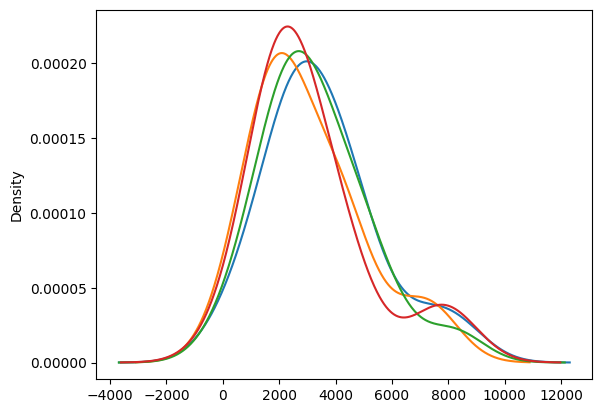

In [6]:
# Kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) 
df_agr = df.groupby(['Type 1']).sum()
df_agr['Attack'].plot.kde()
df_agr['Speed'].plot.kde()
df_agr['Defense'].plot.kde()
df_agr['HP'].plot.kde()

#ax = df_agr.plot.kde()
#import numpy as np
#uniqu = sorted(np.unique(df_agr['HP']))
#df_agr['HP'].plot.kde(ind=uniqu) # To restrict x-axis values to columns valuesS

<Axes: ylabel='Density'>

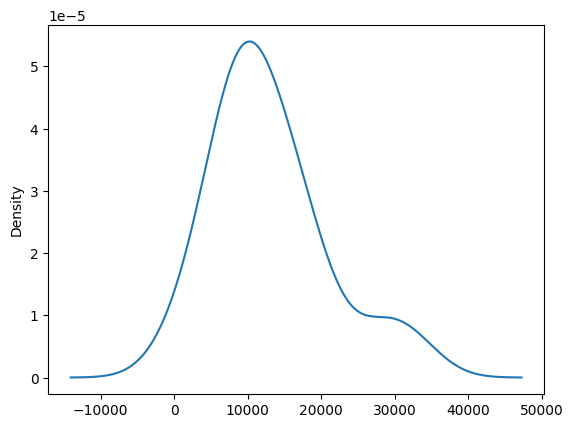

In [7]:
df_agr = df.groupby(['Type 1']).sum()
df_agr['Total'] = df_agr['Attack'] + df_agr['Speed'] + df_agr['Defense'] + df_agr['HP']
df_agr['Total'].plot.kde()

<Axes: ylabel='Frequency'>

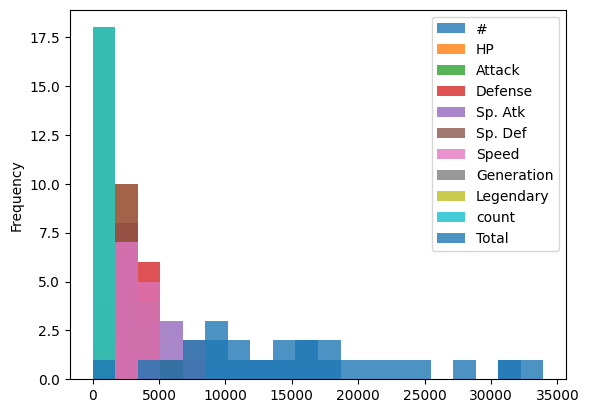

In [8]:
df_agr.plot.hist(bins=20, alpha=0.8)
# Where alpha is an integer between 0 and 1 specifying the transparency of a histogram 
# A lower value of n results in a more transparent 

In [ ]:
#df_agr['Sp. Def'].plot.hist(bins=100, alpha=1)
df['Sp. Def'].plot.hist(bins=30, alpha=1)

In [ ]:
hist = df['Sp. Def'].hist(bins=30, alpha=0.3)

In [ ]:
df.columns

## Working with large amounts of data



In [ ]:
#print(df.columns)
new_df = pd.DataFrame(columns=df.columns)

# Drop 'Type 1' column as we are going to group data using this fields, 
# so this column no more remain as column of data frame
new_df.drop('Type 1', axis=1, inplace=True)
#print(new_df)

for df in pd.read_csv('pokemon_data.csv', chunksize=5):
    results = df.groupby(['Type 1']).count()
    
    new_df = pd.concat([new_df, results])
    #print(results)
    #print(new_df)

new_df
#df['Total'] = df['HP'] + df['Attack'] + df['Defense'] + df['Sp. Atk'] + df['Sp. Def'] + df['Speed']


In [ ]:
new_df['Type 1'] = new_df.index
new_df.tail()

In [ ]:
df2 = new_df[new_df['Type 1']  == 'Fairy']
df2.head()

In [ ]:
df2 = new_df.iloc[new_df.index == 'Fairy']
df2.head()

In [ ]:
df2 = new_df[new_df.index.isin(['Fairy', 'Fire'])]
df2.head()

## Finding Rank in Pandas

In [16]:
data = {'ids': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
        'marks': [30, 28, 32, 29, 32, 26, 21, 17, 19, 28, 32],
        }

df = pd.DataFrame(data)
df

,ids,marks
0,1,30
1,2,28
2,3,32
3,4,29
4,5,32
5,6,26
6,7,21
7,8,17
8,9,19
9,10,28


In [17]:
df.rank(ascending=True)                                           # By Default rank is applied to all columns
                                                    # Rank is applied to all numerical valued columns
                                                    # Hence every column will have it own ranking
                                                    # Columns actual values are replace with rank values

#df[['marks', 'ids']].rank()                        # You can apply rank on selected columns i.e.
#df.rank(ascending=False, method='first')           # By default ascending is True, Default method='average' 
#df.rank(ascending=False, method='first').head(10)                                                   

,ids,marks
0,1.0,8.0
1,2.0,5.5
2,3.0,10.0
3,4.0,7.0
4,5.0,10.0
5,6.0,4.0
6,7.0,3.0
7,8.0,1.0
8,9.0,2.0
9,10.0,5.5


In [14]:
df['rank'] = df['marks'].rank(ascending=True) # Marks are considered for ranking and new column is added for rank, 
df                                             # Default method='average'

,ids,marks,rank
0,1,30,8.0
1,2,28,5.5
2,3,32,10.0
3,4,29,7.0
4,5,32,10.0
5,6,26,4.0
6,7,21,3.0
7,8,17,1.0
8,9,19,2.0
9,10,28,5.5


### Using sort_value and Understanding method parameter

In [ ]:
#df['rank'] = df['marks'].rank(ascending=False, method='first')
#df['rank'] = df['marks'].rank(ascending=False, method='average') # Default method='average' # May be used in Production Statifaction
#df['rank'] = df['marks'].rank(ascending=False, method='min')
#df['rank'] = df['marks'].rank(ascending=False, method='max')
#df['rank'] = df['marks'].rank(ascending=False, method='dense')
df

In [15]:
df.sort_values(['rank'], ascending=True)

,ids,marks,rank
7,8,17,1.0
8,9,19,2.0
6,7,21,3.0
5,6,26,4.0
1,2,28,5.5
9,10,28,5.5
3,4,29,7.0
0,1,30,8.0
2,3,32,10.0
4,5,32,10.0


    method{‘average’, ‘min’, ‘max’, ‘first’, ‘dense’}, default ‘average’
    average: average rank of the group
    min: lowest rank in the group
    max: highest rank in the group
    first: ranks assigned in order they appear in the array
    dense: like ‘min’, but rank always increases by 1 between groups.

In [ ]:
#Pandas Rank's methods argument
#By default, equal values are assigned a rank that is the average of the ranks of those values.
#Values    Position(ASC)    Rank (Average)    Rank (First)    Rank (Maximum)    Rank (Min)    Rank (Dense)    
  #10            1                1                1                1                1              1
  #20            2                2                2                2                2              2 
  #30            3                3.5              3                5                3              3 
  #30            4                3.5              4                5                3              3 
  #30            5                3.5              5                5                3              3 
  #40            6                6                6                6                6              4 (Diff=1) 

#dense: like 'min', but rank always increases by 1 between groups 